In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris,label=load_iris(return_X_y=True)
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris,label,test_size=0.2,shuffle=True)

In [5]:
x_train.shape,y_train.shape

((120, 4), (120,))

In [7]:
import numpy as np
def eculidan_distance_cal(p,q):
    return np.sqrt(np.sum((p-q)**2))

In [8]:
class MyKNN:
    def __init__(self,k=3):
        self.k=k
    
    def fit(self,X,y):
        self.X=X #120
        self.y=y
    
    def predict(self,test):
        predictions=[self.calculate(points) for points in test] #array size == number of x_train
        return predictions
        
    def calculate(self,points):
        distances=[eculidan_distance_cal(small_x,points) for small_x in self.X] #120 array distance
        
        k_label_group=np.argsort(distances)[:self.k]
        k_label=[self.y[x]  for x in k_label_group]
        
        from collections import Counter
        most_vote=Counter(k_label).most_common()
        most_vote=most_vote[0][0]
        return most_vote

In [11]:
model=MyKNN(k=7)
model.fit(x_train,y_train)
values=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(values,y_test)

0.9666666666666667

In [12]:
df=pd.read_csv('dataset/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [55]:
nodf=df[df['Class']==0].sample(500) #sampling
nodf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70450,53872.0,1.168143,0.360814,0.511333,0.764620,-0.381622,-0.887970,0.076430,-0.142678,-0.120937,...,-0.213927,-0.558869,0.211918,0.586897,0.096008,0.088212,-0.001817,0.035133,5.99,0
192129,129551.0,-1.568927,-0.404558,0.696722,-2.459397,0.267158,0.000911,0.258534,0.511136,-1.924344,...,-0.070888,-1.045439,0.137559,0.035457,0.491338,-0.674386,-0.168487,-0.106434,143.10,0
115241,73799.0,-0.730058,1.204413,1.658838,0.957612,-0.349600,0.136301,-0.052070,0.661068,-1.014634,...,0.052099,0.028420,0.069275,0.186807,-0.532155,-0.534054,0.062157,0.075018,5.00,0
92369,63901.0,-2.075313,2.272369,-0.251520,-0.159833,-0.896993,-0.693700,-0.528663,1.437039,-0.477468,...,-0.206016,-0.786850,0.118400,-0.076054,0.056552,0.097113,0.183704,0.073140,9.86,0
55991,47223.0,-0.352282,-0.359878,2.403236,-1.454795,-1.666648,0.028395,-0.576688,-0.319948,-1.537856,...,-0.143223,0.296059,-0.114901,0.416773,-0.499985,-0.229719,-0.328379,-0.077486,41.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90436,63020.0,-0.409807,0.895536,1.110944,-0.162631,0.275871,-0.036181,0.420795,0.327422,-0.384228,...,-0.223611,-0.659756,-0.011833,-0.405549,-0.275121,0.109988,0.246006,0.077984,5.99,0
35456,38125.0,-1.007418,0.912244,1.602771,-0.648534,0.570144,-0.556377,1.305929,-0.438179,-0.468631,...,-0.462763,-1.297321,0.095059,0.059396,0.091404,-0.140061,-0.645547,-0.196124,34.90,0
66616,52132.0,-0.524045,0.669455,1.131443,-0.022596,-0.686665,-0.108020,-0.090994,0.676726,-0.444571,...,0.254549,0.500965,0.181039,0.221184,-0.602440,0.347656,-0.101818,-0.032900,46.85,0
109697,71499.0,1.099810,0.114129,1.386525,2.530134,-0.675278,0.640243,-0.734736,0.391948,0.031519,...,-0.066679,-0.129717,0.002909,-0.023758,0.275002,-0.037529,0.031272,0.020511,3.04,0


In [56]:
yesdf=df[df['Class']==1]

In [20]:
len(nodf)

500

In [21]:
len(yesdf)

492

In [27]:
nodf.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247834,153706.0,2.094166,-0.226142,-1.524207,0.059664,0.322458,-0.302063,-0.030850,-0.043578,0.556196,...,-0.323709,-0.894058,0.209918,-1.134310,-0.229122,0.249894,-0.084651,-0.083882,1.98,0
76303,56504.0,1.157378,0.013319,0.982792,0.607458,-0.646507,-0.185203,-0.414174,0.042867,0.311721,...,-0.004022,0.062903,0.084545,0.111306,0.123145,0.276180,0.018452,0.027380,15.88,0
97464,66232.0,-10.805129,-1.720662,-2.683709,-2.393184,-1.203612,-1.934010,1.100873,-1.114596,6.129132,...,-1.688713,-0.095034,-2.417553,0.678394,0.460011,-0.613996,-2.015113,3.779597,130.99,0


In [28]:
yesdf.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1


In [57]:
df=pd.concat([nodf,yesdf])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
70450,53872.0,1.168143,0.360814,0.511333,0.764620,-0.381622,-0.887970,0.076430,-0.142678,-0.120937,...,-0.213927,-0.558869,0.211918,0.586897,0.096008,0.088212,-0.001817,0.035133,5.99,0
192129,129551.0,-1.568927,-0.404558,0.696722,-2.459397,0.267158,0.000911,0.258534,0.511136,-1.924344,...,-0.070888,-1.045439,0.137559,0.035457,0.491338,-0.674386,-0.168487,-0.106434,143.10,0
115241,73799.0,-0.730058,1.204413,1.658838,0.957612,-0.349600,0.136301,-0.052070,0.661068,-1.014634,...,0.052099,0.028420,0.069275,0.186807,-0.532155,-0.534054,0.062157,0.075018,5.00,0
92369,63901.0,-2.075313,2.272369,-0.251520,-0.159833,-0.896993,-0.693700,-0.528663,1.437039,-0.477468,...,-0.206016,-0.786850,0.118400,-0.076054,0.056552,0.097113,0.183704,0.073140,9.86,0
55991,47223.0,-0.352282,-0.359878,2.403236,-1.454795,-1.666648,0.028395,-0.576688,-0.319948,-1.537856,...,-0.143223,0.296059,-0.114901,0.416773,-0.499985,-0.229719,-0.328379,-0.077486,41.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [58]:
X=df.drop('Class',axis=1)
y=df['Class']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [35]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
46548,42828.0,-0.952746,0.484831,0.408881,-1.954129,-0.061665,-0.258212,0.296466,0.156753,-0.642983,...,0.328394,0.171836,0.950502,-0.192378,-0.288984,-0.254148,-0.341881,0.165833,-0.160716,20.00
53591,46057.0,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,...,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00
202287,134252.0,-0.595313,0.176658,0.192951,-2.371378,1.814771,1.245750,0.837291,0.330209,0.306111,...,-0.110402,0.202169,1.015259,-0.272894,-0.631635,-0.254942,1.265598,0.124388,-0.046774,10.00
18773,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68
256943,157928.0,2.301775,-1.256295,-1.083086,-1.610839,-0.926889,-0.497755,-0.971890,-0.250068,-1.410903,...,-0.337322,-0.161210,0.078837,0.238571,0.615832,-0.111112,-0.188268,0.013349,-0.042851,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155487,105561.0,-0.268303,0.571878,0.000280,-0.630563,1.702967,-0.770438,0.902283,-0.543368,1.489848,...,-0.039414,-0.434765,-0.578426,-0.035098,-1.032349,-1.194632,-0.012711,0.187310,0.050630,5.49
10630,17838.0,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,...,-0.623737,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,766.36
198325,132437.0,-1.061888,0.307790,1.180453,-2.867252,0.009395,0.787388,-0.350104,-2.079248,-2.091188,...,-0.399956,1.355434,-0.463022,-0.280960,0.202835,0.558633,-0.073836,-0.755199,-0.386348,5.00
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00


In [60]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
pred_value=model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
score=round(accuracy_score(pred_value,y_test),2)*100
score

68.0

In [62]:
#Training 
pred_value_train=model.predict(x_train)
score=round(accuracy_score(pred_value_train,y_train),2)*100
score

82.0

In [64]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,cv=5)
scores.mean()

0.6468832099355147

In [66]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr_model=LogisticRegression(multi_class='multinomial')
lr_model.fit(x_train,y_train)
test_value=lr_model.predict(x_test)
train_value=lr_model.predict(x_train)

In [92]:
train_cv_scores=cross_val_score(lr_model,X,y,cv=5).mean()
test_cv_scores=cross_val_score(lr_model,X,y,cv=5).mean()
print(f"Train cv score {train_cv_scores}")
print(f"Train cv score {test_cv_scores}")

C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train cv score 0.9374600274097762
Train cv score 0.9374600274097762


C:\Users\Dell\anaconda3\envs\aiproject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
pred_value=model.predict(x_test)

<Axes: >

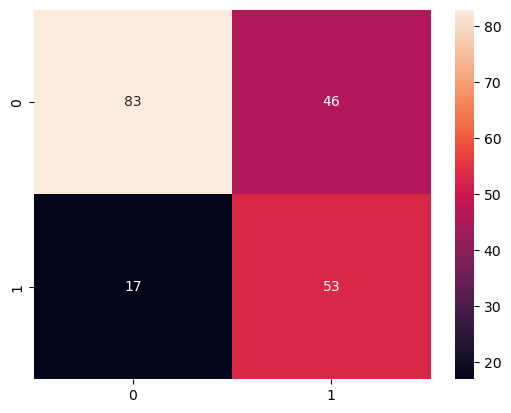

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix=confusion_matrix(pred_value,y_test)
sns.heatmap(pd.DataFrame(matrix),annot=True)

In [81]:
tn, fp, fn, tp =matrix.ravel()

In [82]:
tn

83

In [83]:
fp

46

In [84]:
fn

17

In [85]:
tp

53

In [86]:
precision=tp/(tp+fp)
precision

0.5353535353535354

In [87]:
recall=tp/(tp+fn)
recall

0.7571428571428571

In [89]:
error=(fp+fn)/(tp+tn+fp+fn)
error

0.3165829145728643

In [90]:
f_measure= (2*precision*recall)/(precision*recall)

In [91]:
f_measure

2.0

In [93]:
import joblib
joblib.dump(lr_model,'credit_card_model.joblib')
print('done')

done


In [94]:
mymodel=joblib.load('credit_card_model.joblib')
result=mymodel.predict(x_test)
accuracy_score(result,y_test)

0.9447236180904522

In [101]:
iris,label=load_iris(return_X_y=True,as_frame=True)
x_train,x_test,y_train,y_test=train_test_split(iris,label,test_size=0.2,shuffle=True)
kmodel=KNeighborsClassifier(n_neighbors=3)
kmodel.fit(x_train,y_train)
pred_value=kmodel.predict(x_test)
accuracy_score(pred_value,y_test)

0.9333333333333333

In [102]:
joblib.dump(kmodel,'iris_knn_model.joblib')


['iris_knn_model.joblib']

In [103]:
import pickle
with open('iris_knn.pkl', 'wb') as model_file:
    pickle.dump(kmodel, model_file)

In [105]:
import sklearn
sklearn.__version__

'1.2.2'